# Deep Learning入門

## Convolutional Neural Network(CNN) のサンプル

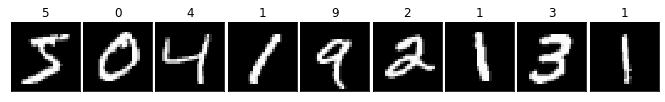

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot, to_categorical

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

## 前処理

In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## モデル作成

In [3]:
# Sequential: ネットワークを1列に積み上げているシンプルな方法
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    # optimizer='sgd',
    # 最適化手法として Adam を使用している。
    optimizer=Adam(),
    metrics=['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## モデル可視化

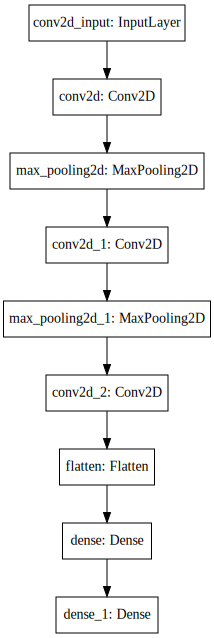

In [4]:
SVG(model_to_dot(model, dpi=72).create(prog='dot', format='svg'))

## モデル学習

In [5]:
history = model.fit(
    x_train, y_train,
    batch_size=400, epochs=10, verbose=1,
    validation_data=(x_test, y_test),
    # 早期終了: 検証データの誤差が大きくなってきた（或いは評価関数値が下がってきた）ところで学習をストップさせる
    callbacks=[EarlyStopping(patience=0, verbose=1)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 829us/sample - loss: 1.3639 - acc: 0.8288 - val_loss: 0.1310 - val_acc: 0.9616
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.1096 - acc: 0.9665 - val_loss: 0.0965 - val_acc: 0.9700
Epoch 3/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.0704 - acc: 0.9779 - val_loss: 0.0694 - val_acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0620 - val_acc: 0.9813
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0378 - acc: 0.9883 - val_loss: 0.0539 - val_acc: 0.9828
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0311 - acc: 0.9900 - val_loss: 0.0552 - val_acc: 0.9833
Epoch 00006: early stopping


## モデル評価

Test loss: 0.05521193923940882
Test accuracy: 0.9833


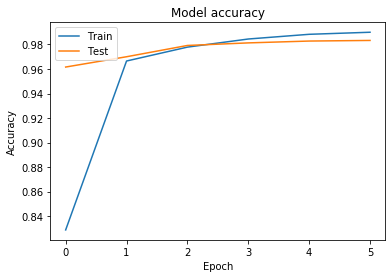

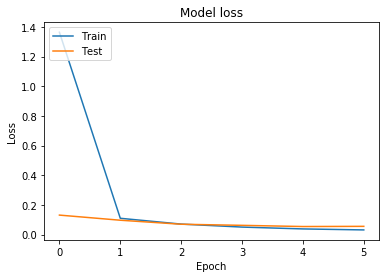

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()